**Artificial Neural Network (ANN) vs Linear Regression for California Housing Data**

Throughout this project it will be showing a process to predict house pricing in California. Consequently, two machine learning models were implemented to identify different aspects into each model and evaluate the performance. First model implemented was linear regression according to this model, Mean Square Error and R2 Score were the parameters used to evaluate the model. 
In the other hand, the second model that was implemented was an Artificial Neural Network using Keras library into Python. Finally, some conclusions about the performance and accuracy of each model, as well as process executed to implement both models will be explained in this document.

Student name: Javier Melo
Student number: C0871987


**Linear Regression**

In [22]:
# Importing libraries requeried 

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


In [2]:
# Loading dataset for House Pricing in California

california_housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[california_housing.data, california_housing.target], columns=california_housing.feature_names + ['target'])

In [3]:
# Exploring dataset

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

**Pre Processing Data**

In [4]:
# Checking for null values

print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

X = data_no_outliers.drop('target', axis=1)
y = data_no_outliers['target']

In [6]:
# Splitting data among train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (13049, 8)
X_test: (3263, 8)
y_train: (13049,)
y_test: (3263,)


**Implementing Linear Regression Model**

In [7]:
# Initializing and training the model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Executing predictions

y_pred_linear = linear_model.predict(X_test)

**Visualizations**

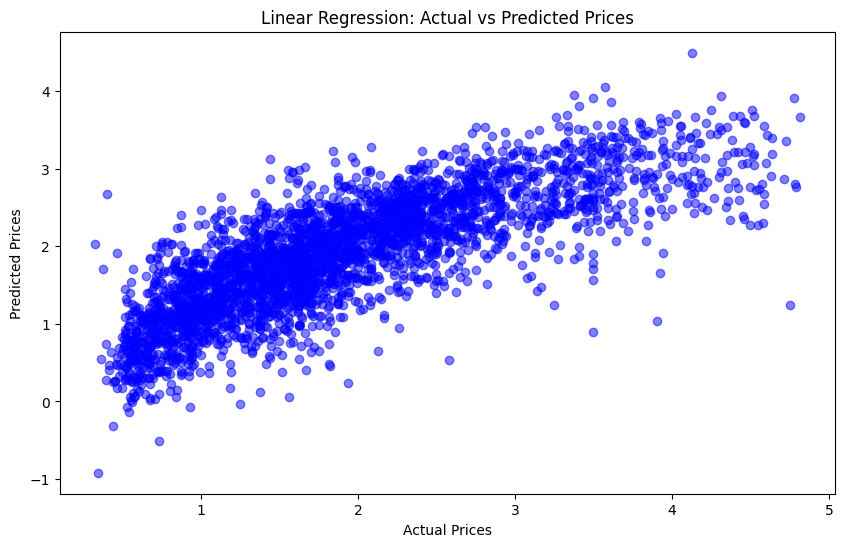

In [17]:
# Scatter plot for Linear Regression

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [9]:
# Evaluating the model 

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'R2 Score (Linear Regression): {r2_linear}')

Mean Squared Error (Linear Regression): 0.31652227705444796
R2 Score (Linear Regression): 0.6378964374821554


**Artificial Neural Network**

In [10]:
# Fitting parameters to the model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# creating the model using Keras

model_ann = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida para la regresión
])

# Compiling the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Generating a summary of the model
model_ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Training the model with 50 iterations

model_ann.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

c:\Users\Javier Melo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
327/327 [==============================] - 2s 3ms/step - loss: 0.5021 - val_loss: 0.3249
Epoch 2/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2913 - val_loss: 0.2840
Epoch 3/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2725 - val_loss: 0.2771
Epoch 4/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2654 - val_loss: 0.2607
Epoch 5/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2591 - val_loss: 0.2610
Epoch 6/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2545 - val_loss: 0.2655
Epoch 7/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2493 - val_loss: 0.2608
Epoch 8/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2434 - val_loss: 0.2567
Epoch 9/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2385 - val_loss: 0.2447
Epoch 10/50
327/327 [==============================] - 1s 2ms/step - loss: 0.2316 - val_loss: 0.2448

**Model Visualization**

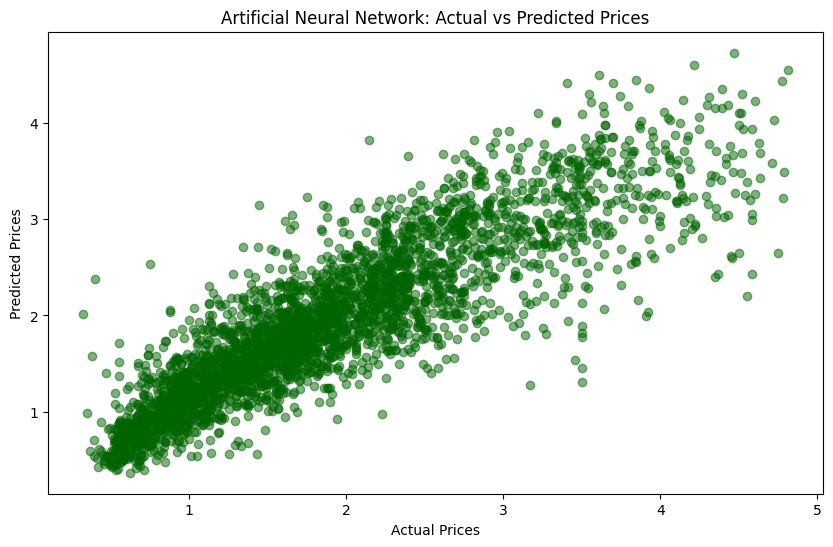

In [21]:
# Scatter plot for Artificial Neural Network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ann, color='darkgreen', alpha=0.5)
plt.title('Artificial Neural Network: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

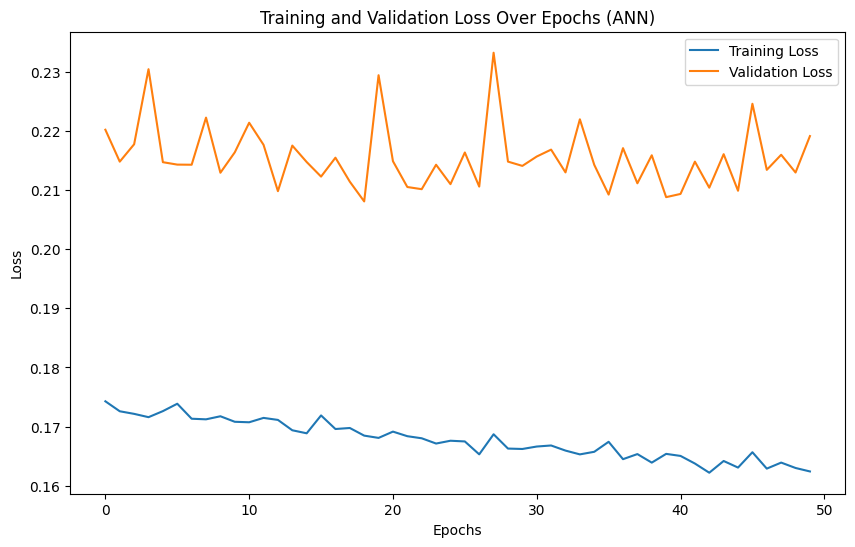

In [23]:
# Plot training and validation loss for ANN
history = model_ann.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs (ANN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Model Evaluation**

In [26]:
# Making predictions into the test data

y_pred_ann = model_ann.predict(X_test_scaled)

# Evaluating the model

mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f'Mean Squared Error (ANN): {mse_ann}')
print(f'R2 Score (ANN): {r2_ann}')


102/102 [==============================] - 0s 2ms/step
Mean Squared Error (ANN): 0.201482459927091
R2 Score (ANN): 0.7695027433664381


**Comparison and Analysis between models**

In [28]:

# Performance metrics for Linear Regression and ANN

print("Linear Regression Metrics:")
print(f'Mean Squared Error: {mse_linear}')
print(f'R2 Score: {r2_linear}')
print("\nArtificial Neural Network Metrics:")
print(f'Mean Squared Error: {mse_ann}')
print(f'R2 Score: {r2_ann}')


Linear Regression Metrics:
Mean Squared Error: 0.31652227705444796
R2 Score: 0.6378964374821554

Artificial Neural Network Metrics:
Mean Squared Error: 0.201482459927091
R2 Score: 0.7695027433664381


**Comparison**

The ANN model outperforms the Linear Regression model in both MSE and R2 Score. This indicates that the ANN, with its ability to capture complex relationships in the data, has achieved better predictive performance on this particular task.

The R2 Score for the ANN (0.7695) suggests that approximately 76.95% of the variance in the target variable is captured by the model, which is a relatively good fit.

In summary, based on the obtained results, the Artificial Neural Network appears to be a more effective model for predicting housing prices in this dataset compared to the Linear Regression model.

**Conclusion**

Linear Regression might be preferred wheter interpretability and simplicity are crucial, and the relationship between features and the target is primarily linear.

If the data has complex patterns, and companies are willing to invest in computational resources, the ANN may provide better predictive performance.

The choice between these models depends on the specific characteristics of data that we are using and the goals of the  project.

I consider, could be a good approach to start with simpler models like Linear Regression and then explore more complex models like ANNs if a linear regression is not fited, based on the performance and requirements.